# Bayesian Line Fitting

The purpose of the this notebook is to fit a line $a\cdot x + b$, where $a$ is the slope of the line and $b$ is the intercept, within a Bayesian framework to a data set $D = \lbrace (x_i, y_i) \ | \ i = 1,..., N  \rbrace$. 

$P(a|D,I) =  \int \ d\sigma \int \ db \ P(a,b, \sigma |D,I)$

From Bayes theorem, with the assumption that $a$, $b$ and $\sigma$ are independent, we have that

$P(a,b, \sigma|D,I) \propto P(D|a,b,\sigma,I) \cdot P(a|I) \cdot P(b|I) \cdot P(\sigma|I) $.

Here, we have

$P(D|a,b,\sigma,I) = \frac{1}{\left( 2\pi \sigma^2 \right)^{N/2}} e^{-\frac{1}{2}\chi^2(a,b,\sigma)}$,

$\chi^2(a,b,\sigma) = \sum\limits_{i=1}^{N} \frac{1}{\sigma^2}(y_i - a\cdot x_i - b)^2$,

and where $P(a|I)$, $ P(b|I)$ and $ P(\sigma|I)$ are the Bayesian priors of the parameters $a$,$b$ and $\sigma$ respectively. With the above expressions we obtain the final results given by 

$P(a|D,I) \propto \int \ d\sigma \int \ db  \ P(D|a,b,\sigma) \cdot P(a|I) \cdot P(b|I) \cdot P(\sigma|I) $,

$P(b|D,I) \propto \int \ d\sigma \int \ da  \ P(D|a,b,\sigma) \cdot P(a|I) \cdot P(b|I) \cdot P(\sigma|I) $.

Finally, we can also obtain the probability distribution of $\sigma$

$P(\sigma |D,I) \propto \int \ da \int \ db \ P(D|a,b,\sigma) \cdot P(a|I) \cdot P(b|I) \cdot P(\sigma|I) $,





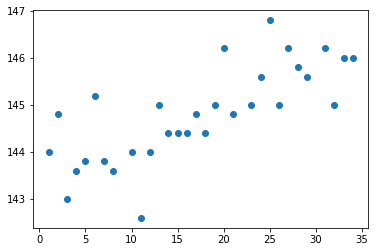

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import bayes_line_fit as blf
from scipy import stats

# Read in all available weight data from data file
fname = "weight2.txt"
data = np.loadtxt(fname)
Ndata = len(data)

# Extract the indices of the days
days = np.asarray([data[k][0] for k in range(0,Ndata)])

# Extract the body weight per day in lbs
weight = np.asarray([data[k][1] for k in range(0,Ndata)])

a0, b0, r_value, p_value, std_err = stats.linregress(days,weight)

plt.plot(days,weight,"o")
plt.show()

In [7]:
#--------------------------------------------------------------------------------------
# Now we sample the distribution P(D|a,b,sigma) using Markov Chain Monte Carlo
#---------------------------------------------------------------------------------------

print("a0: "+str(a0))
print("b0: "+str(b0))

sig0 = 1.0
Tmax = 50000
Tburn = 200
dsigma = 0.1
fit1 = blf.bayesian_line(days,weight)

a,b,sig,T = fit1.MCMC(sig0,Tmax,Tburn,dsigma)
al,dal,bl,dbl = fit1.calculate_results(sig0,Tmax,Tburn,dsigma)

a0: 0.0767701571575
b0: 143.484023744
0.710335185207
0.101743575875



0.0781168749289
0.0124621459153


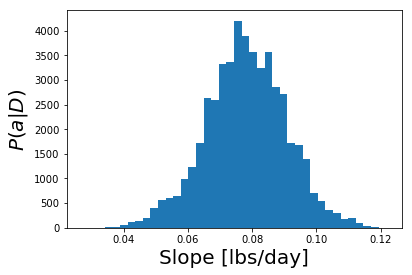

In [12]:
print(a.mean())
print(a.std())
plt.hist(a,bins=40)
plt.ylabel("$P(a|D)$",fontsize=20)
plt.xlabel("Slope [lbs/day]",fontsize=20)
plt.show()

143.45061538
0.246685541468


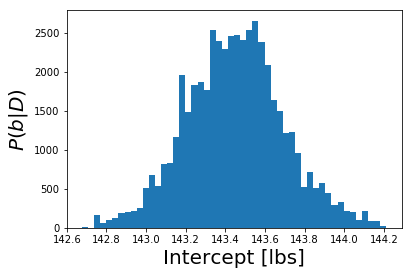

In [13]:
print(b.mean())
print(b.std())
plt.hist(b,bins=50)
plt.ylabel("$P(b|D)$",fontsize=20)
plt.xlabel("Intercept [lbs]",fontsize=20)
plt.show()

0.697486624832
0.0993218602937


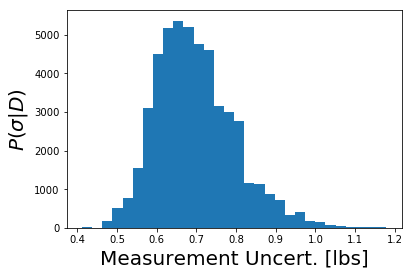

In [14]:
print(sig.mean())
print(sig.std())
plt.hist(sig,bins=30)
plt.ylabel("$P(\sigma|D)$",fontsize=20)
plt.xlabel("Measurement Uncert. [lbs]",fontsize=20)
plt.show()

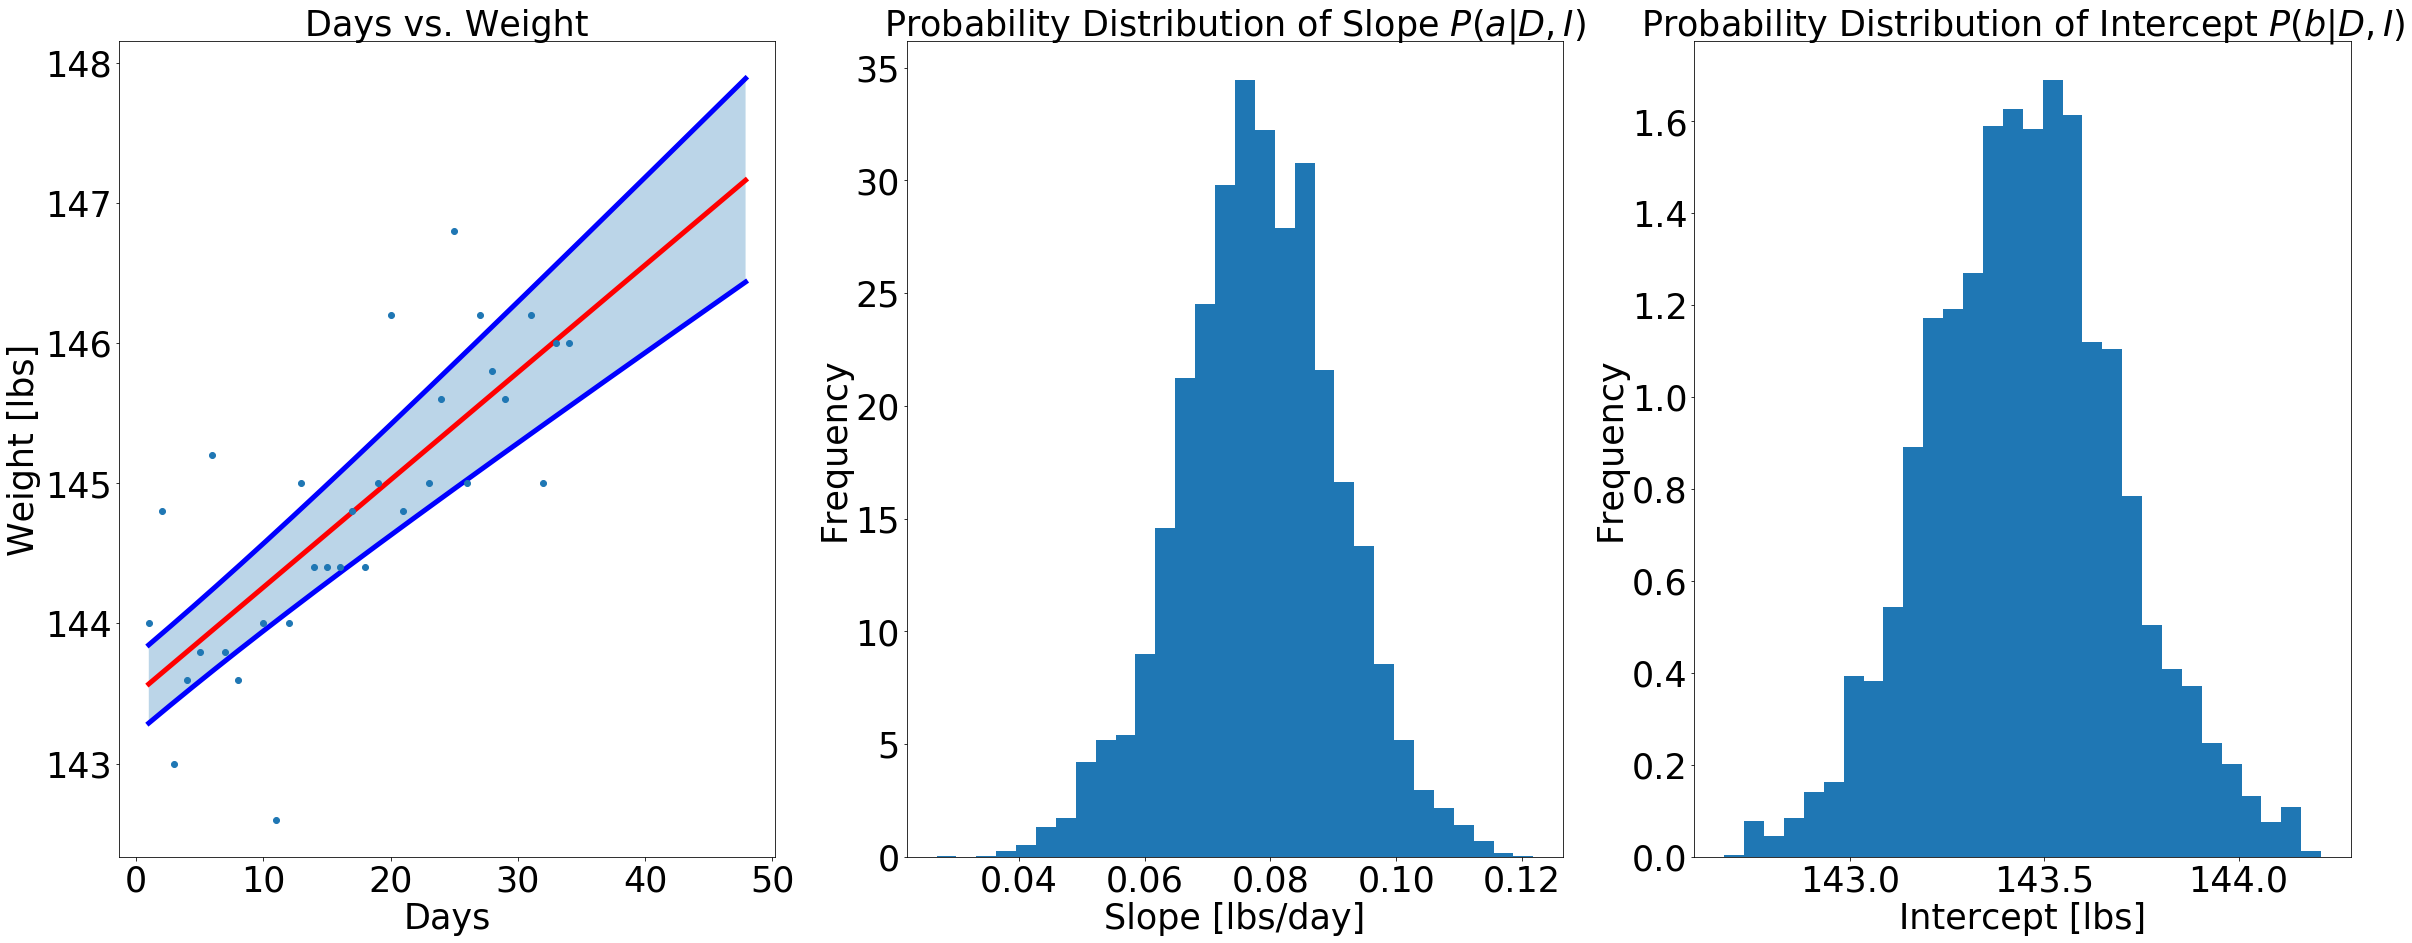

In [11]:
plt.clf()
width = 40
height = 15
fs = 35
f, axarr = plt.subplots(1, 3,figsize=(width, height))

x = np.arange(days[0],days[-1]+14,0.1)
yl = al*x+bl
yp1,dyp1 = fit1.predict(al,bl,dal,dbl,x)
axarr[0].plot(x,yl,color="r",linewidth=5)
axarr[0].plot(x,yp1+dyp1,color="b",linewidth=5)
axarr[0].plot(x,yp1-dyp1,color="b",linewidth=5)
axarr[0].fill_between(x, yp1-dyp1, yp1+dyp1,alpha=0.3)
axarr[0].plot(days,weight,"o")

axarr[1].hist(a,bins=30,normed=True)
axarr[2].hist(b,bins=30,normed=True)

axarr[0].set_title('Days vs. Weight', fontsize = fs)
axarr[0].set_xlabel('Days', fontsize = fs)
axarr[0].set_ylabel('Weight [lbs]', fontsize = fs)
axarr[1].set_title('Probability Distribution of Slope $P(a|D,I)$', fontsize = fs)
axarr[1].set_xlabel('Slope [lbs/day]', fontsize = fs)
axarr[1].set_ylabel('Frequency', fontsize = fs)
axarr[2].set_title('Probability Distribution of Intercept $P(b|D,I)$', fontsize = fs)
axarr[2].set_xlabel('Intercept [lbs]', fontsize = fs)
axarr[2].set_ylabel('Frequency', fontsize = fs)

axarr[0].tick_params(axis='both', labelsize=fs)
axarr[1].tick_params(axis='both', labelsize=fs)
axarr[2].tick_params(axis='both', labelsize=fs)

plt.show()